# Проект попытка первая - обработка текста


### Цель данного проекта - научиться обрабатывать текстовый материал (не очень большой по объему) и делать визуализацию по типу WordCloud. Мой функционал впрямую не связан с IT (я- HR, по второму образованию - лингвист, поэтому тема мне близка), но периодически поступают задачи визуализировать текстовый материал определенным образом, поэтому для меня шаг первый - научиться обрабатывать текст и делать WordCloud. 

In [1]:
pip install -U nltk

Requirement already up-to-date: nltk in c:\users\oksan\anaconda3\lib\site-packages (3.6.2)Note: you may need to restart the kernel to use updated packages.



In [2]:
import nltk # pip install -U nltk
nltk.download("stopwords") # nltk.download() для скачивания всех дополнительных возможностей
nltk.download('punkt')
nltk.download('wordnet')#  For more information see: https://www.nltk.org/data.html


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oksan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oksan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oksan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<center>
<img src="./pict/text_prerpoc_pipeline.png">
<br />
<br />

### Первые попытки были обработать "Мастера и Маргариту", но большой объем текста не поддавался обработке, ноут "умирал" на этапе лемматизации, далее я приняла решение взять маленький по объему текст, чтобы получить результат. В итоге ноут осилил обработку "Сказ про Федота-стрельца" Л.Филатова

In [3]:
with open('D:/Sber Python/мое/FS.txt', 'r') as f:  # считываем текстовый файл
    ved = f.read()
   

In [4]:
#import codecs #импорт кодека, чтобы избавиться от ошибки
#file = codecs.open( "D:/Работа с данными на Python Сбер/мое/МиМ.txt", "r", "utf-8" )
#ved = file.read()

In [5]:
type(ved)

str

In [6]:
ved[:1000]#смотрим первые 1000 элементов

'\nПро Федота-Стрельца\n\nСкоморох-потешник\n\nВерьте аль не верьте, а жил на белом свете Федот-стрелец, удалой молодец. Был Федот ни красавец, ни урод, ни румян, ни бледен, ни богат, ни беден, ни в парше, ни в парче, а так, вообче. Служба у Федота – рыбалка да охота. Царю – дичь да рыба, Федоту – спасибо. Гостей во дворце – как семян в огурце. Один из Швеции, другой из Греции, третий с Гавай – и всем жрать подавай! Одному – омаров, другому – кальмаров, третьему – сардин, а добытчик один! Как-то раз дают ему приказ: чуть свет поутру явиться ко двору. Царь на вид сморчок, башка с кулачок, а злобности в ем – агромадный объем. Смотрит на Федьку, как язвенник на редьку. На Федьке от страха намокла рубаха, в висках застучало, в пузе заурчало, тут, как говорится, и сказке начало…\n\n\nЦарь\n\n\t\tК нам на утренний рассол\n\t\tПрибыл аглицкий посол,\n\t\tА у нас в дому закуски\xa0–\n\t\tПолгорбушки да мосол.\n\n\t\tСнаряжайся, братец, в путь\n\t\tДа съестного нам добудь\xa0–\n\t\tГлухаря аль 

In [7]:
paragraphs = [sen for sen in ved.split('\n') if sen]  # разбиваем на параграфы
paragraphs[:5]

['Про Федота-Стрельца',
 'Скоморох-потешник',
 'Верьте аль не верьте, а жил на белом свете Федот-стрелец, удалой молодец. Был Федот ни красавец, ни урод, ни румян, ни бледен, ни богат, ни беден, ни в парше, ни в парче, а так, вообче. Служба у Федота – рыбалка да охота. Царю – дичь да рыба, Федоту – спасибо. Гостей во дворце – как семян в огурце. Один из Швеции, другой из Греции, третий с Гавай – и всем жрать подавай! Одному – омаров, другому – кальмаров, третьему – сардин, а добытчик один! Как-то раз дают ему приказ: чуть свет поутру явиться ко двору. Царь на вид сморчок, башка с кулачок, а злобности в ем – агромадный объем. Смотрит на Федьку, как язвенник на редьку. На Федьке от страха намокла рубаха, в висках застучало, в пузе заурчало, тут, как говорится, и сказке начало…',
 'Царь',
 '\t\tК нам на утренний рассол']

In [8]:
len(paragraphs) # количество параграфов

1558

In [9]:
nltk.sent_tokenize(paragraphs[5]) # умное разбиение на предложения

['\t\tПрибыл аглицкий посол,']

In [10]:
#\xa0 - это неразрывный пробел, Элемент компьютерной кодировки текстов, 
#отображающийся внутри строки подобно обычному пробелу,
#но не позволяющий программам отображения и печати разорвать в этом месте строку. Используется для автоматизации вёрстки, 
#правила которой предписывают избегать разрыва строк в известных случаях (большей частью для удобочитаемости)

sentences = [nltk.sent_tokenize(paragraph) for paragraph in paragraphs] # токенизация по предложениям
sentences = [sen for sublist in sentences for sen in sublist]
sentences[:10]

['Про Федота-Стрельца',
 'Скоморох-потешник',
 'Верьте аль не верьте, а жил на белом свете Федот-стрелец, удалой молодец.',
 'Был Федот ни красавец, ни урод, ни румян, ни бледен, ни богат, ни беден, ни в парше, ни в парче, а так, вообче.',
 'Служба у Федота – рыбалка да охота.',
 'Царю – дичь да рыба, Федоту – спасибо.',
 'Гостей во дворце – как семян в огурце.',
 'Один из Швеции, другой из Греции, третий с Гавай – и всем жрать подавай!',
 'Одному – омаров, другому – кальмаров, третьему – сардин, а добытчик один!',
 'Как-то раз дают ему приказ: чуть свет поутру явиться ко двору.']

In [11]:
len(sentences) # всего предложений

1728

In [12]:
tokens_sentences = [nltk.word_tokenize(sentence) for sentence in sentences] # токенизация по словам

print(tokens_sentences[:10])

[['Про', 'Федота-Стрельца'], ['Скоморох-потешник'], ['Верьте', 'аль', 'не', 'верьте', ',', 'а', 'жил', 'на', 'белом', 'свете', 'Федот-стрелец', ',', 'удалой', 'молодец', '.'], ['Был', 'Федот', 'ни', 'красавец', ',', 'ни', 'урод', ',', 'ни', 'румян', ',', 'ни', 'бледен', ',', 'ни', 'богат', ',', 'ни', 'беден', ',', 'ни', 'в', 'парше', ',', 'ни', 'в', 'парче', ',', 'а', 'так', ',', 'вообче', '.'], ['Служба', 'у', 'Федота', '–', 'рыбалка', 'да', 'охота', '.'], ['Царю', '–', 'дичь', 'да', 'рыба', ',', 'Федоту', '–', 'спасибо', '.'], ['Гостей', 'во', 'дворце', '–', 'как', 'семян', 'в', 'огурце', '.'], ['Один', 'из', 'Швеции', ',', 'другой', 'из', 'Греции', ',', 'третий', 'с', 'Гавай', '–', 'и', 'всем', 'жрать', 'подавай', '!'], ['Одному', '–', 'омаров', ',', 'другому', '–', 'кальмаров', ',', 'третьему', '–', 'сардин', ',', 'а', 'добытчик', 'один', '!'], ['Как-то', 'раз', 'дают', 'ему', 'приказ', ':', 'чуть', 'свет', 'поутру', 'явиться', 'ко', 'двору', '.']]


In [13]:
tokens_sentences[10] # пример токенизированного предложения

['Царь',
 'на',
 'вид',
 'сморчок',
 ',',
 'башка',
 'с',
 'кулачок',
 ',',
 'а',
 'злобности',
 'в',
 'ем',
 '–',
 'агромадный',
 'объем',
 '.']

In [14]:
# приведение к нижнему регистру

tokens_sentences = [[token.lower() for token in token_sentence] for token_sentence in tokens_sentences]

print(tokens_sentences[:10])

[['про', 'федота-стрельца'], ['скоморох-потешник'], ['верьте', 'аль', 'не', 'верьте', ',', 'а', 'жил', 'на', 'белом', 'свете', 'федот-стрелец', ',', 'удалой', 'молодец', '.'], ['был', 'федот', 'ни', 'красавец', ',', 'ни', 'урод', ',', 'ни', 'румян', ',', 'ни', 'бледен', ',', 'ни', 'богат', ',', 'ни', 'беден', ',', 'ни', 'в', 'парше', ',', 'ни', 'в', 'парче', ',', 'а', 'так', ',', 'вообче', '.'], ['служба', 'у', 'федота', '–', 'рыбалка', 'да', 'охота', '.'], ['царю', '–', 'дичь', 'да', 'рыба', ',', 'федоту', '–', 'спасибо', '.'], ['гостей', 'во', 'дворце', '–', 'как', 'семян', 'в', 'огурце', '.'], ['один', 'из', 'швеции', ',', 'другой', 'из', 'греции', ',', 'третий', 'с', 'гавай', '–', 'и', 'всем', 'жрать', 'подавай', '!'], ['одному', '–', 'омаров', ',', 'другому', '–', 'кальмаров', ',', 'третьему', '–', 'сардин', ',', 'а', 'добытчик', 'один', '!'], ['как-то', 'раз', 'дают', 'ему', 'приказ', ':', 'чуть', 'свет', 'поутру', 'явиться', 'ко', 'двору', '.']]


In [15]:
tokens_sentences[10]

['царь',
 'на',
 'вид',
 'сморчок',
 ',',
 'башка',
 'с',
 'кулачок',
 ',',
 'а',
 'злобности',
 'в',
 'ем',
 '–',
 'агромадный',
 'объем',
 '.']

In [16]:
# стандартные пунктуационные символы
from string import punctuation

punctuation = punctuation + '»' + '«'
punctuation = punctuation + '–' 
punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~»«–'

In [17]:
# удаление знаков пунктуации
tokens_sentences = [[token for token in token_sentence if token not in punctuation] 
                    for token_sentence in tokens_sentences] 
print(tokens_sentences[:10])

[['про', 'федота-стрельца'], ['скоморох-потешник'], ['верьте', 'аль', 'не', 'верьте', 'а', 'жил', 'на', 'белом', 'свете', 'федот-стрелец', 'удалой', 'молодец'], ['был', 'федот', 'ни', 'красавец', 'ни', 'урод', 'ни', 'румян', 'ни', 'бледен', 'ни', 'богат', 'ни', 'беден', 'ни', 'в', 'парше', 'ни', 'в', 'парче', 'а', 'так', 'вообче'], ['служба', 'у', 'федота', 'рыбалка', 'да', 'охота'], ['царю', 'дичь', 'да', 'рыба', 'федоту', 'спасибо'], ['гостей', 'во', 'дворце', 'как', 'семян', 'в', 'огурце'], ['один', 'из', 'швеции', 'другой', 'из', 'греции', 'третий', 'с', 'гавай', 'и', 'всем', 'жрать', 'подавай'], ['одному', 'омаров', 'другому', 'кальмаров', 'третьему', 'сардин', 'а', 'добытчик', 'один'], ['как-то', 'раз', 'дают', 'ему', 'приказ', 'чуть', 'свет', 'поутру', 'явиться', 'ко', 'двору']]


In [18]:
tokens_sentences[10]

['царь',
 'на',
 'вид',
 'сморчок',
 'башка',
 'с',
 'кулачок',
 'а',
 'злобности',
 'в',
 'ем',
 'агромадный',
 'объем']

In [19]:
# удаление оставшихся токенов, которые не являются буквенными

tokens_sentences = [[token for token in token_sentence if token.isalpha()] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['про'], [], ['верьте', 'аль', 'не', 'верьте', 'а', 'жил', 'на', 'белом', 'свете', 'удалой', 'молодец'], ['был', 'федот', 'ни', 'красавец', 'ни', 'урод', 'ни', 'румян', 'ни', 'бледен', 'ни', 'богат', 'ни', 'беден', 'ни', 'в', 'парше', 'ни', 'в', 'парче', 'а', 'так', 'вообче'], ['служба', 'у', 'федота', 'рыбалка', 'да', 'охота'], ['царю', 'дичь', 'да', 'рыба', 'федоту', 'спасибо'], ['гостей', 'во', 'дворце', 'как', 'семян', 'в', 'огурце'], ['один', 'из', 'швеции', 'другой', 'из', 'греции', 'третий', 'с', 'гавай', 'и', 'всем', 'жрать', 'подавай'], ['одному', 'омаров', 'другому', 'кальмаров', 'третьему', 'сардин', 'а', 'добытчик', 'один'], ['раз', 'дают', 'ему', 'приказ', 'чуть', 'свет', 'поутру', 'явиться', 'ко', 'двору']]


In [20]:
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

### После первой успешной попытки построить облако стало ясно, что особенностью данного текста являются устарешие слова, которые не распознаются современным словарем, но в то же время не несут особой семантической нагрузки или являются служебными по сути, и их надо было добавить в список stop_words и пройти цикл заново...

In [21]:
stop_words += ['который', 'это','аль','дак', 'али', 'чаво', 'коли', 'ишо', 'сколь', 'чай', 'энто', 'кабы']

In [22]:
# удаление стоп слов русского языка
tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[[], [], ['верьте', 'верьте', 'жил', 'белом', 'свете', 'удалой', 'молодец'], ['федот', 'красавец', 'урод', 'румян', 'бледен', 'богат', 'беден', 'парше', 'парче', 'вообче'], ['служба', 'федота', 'рыбалка', 'охота'], ['царю', 'дичь', 'рыба', 'федоту', 'спасибо'], ['гостей', 'дворце', 'семян', 'огурце'], ['швеции', 'греции', 'третий', 'гавай', 'всем', 'жрать', 'подавай'], ['одному', 'омаров', 'другому', 'кальмаров', 'третьему', 'сардин', 'добытчик'], ['дают', 'приказ', 'свет', 'поутру', 'явиться', 'ко', 'двору']]


In [23]:
tokens_sentences[10]

['царь',
 'вид',
 'сморчок',
 'башка',
 'кулачок',
 'злобности',
 'ем',
 'агромадный',
 'объем']

In [24]:
#оставляем только основу слова с лексическим смыслом, удалаем окончания для всех частей речи
#стемминг - Морфологические Карты различных форм одного и то же слово 
from nltk.stem.snowball import SnowballStemmer ## долго

porter = SnowballStemmer(language='russian') # стэммер
tokens_stemming = [[porter.stem(token) for token in token_sentence] for token_sentence in tokens_sentences]

# стэмминг
print(tokens_stemming[:10])

[[], [], ['верьт', 'верьт', 'жил', 'бел', 'свет', 'удал', 'молодец'], ['федот', 'красавец', 'урод', 'румя', 'блед', 'богат', 'бед', 'парш', 'парч', 'вообч'], ['служб', 'федот', 'рыбалк', 'охот'], ['цар', 'дич', 'рыб', 'федот', 'спасиб'], ['гост', 'дворц', 'семя', 'огурц'], ['швец', 'грец', 'трет', 'гава', 'всем', 'жрат', 'подава'], ['одн', 'омар', 'друг', 'кальмар', 'трет', 'сардин', 'добытчик'], ['дают', 'приказ', 'свет', 'поутр', 'яв', 'ко', 'двор']]


In [25]:
tokens_stemming[10]

['цар',
 'вид',
 'сморчок',
 'башк',
 'кулачок',
 'злобност',
 'ем',
 'агромадн',
 'обь']

In [26]:
pip install pymystem3 


Note: you may need to restart the kernel to use updated packages.


In [27]:
#Морфологический анализатор русского языка

In [28]:
from pymystem3 import Mystem # pip install pymystem3, долго

In [29]:
mystem = Mystem() # лемматизатор

# приведение слова к его канонической форме - лемме
tokens_sentences = [[mystem.lemmatize(token)[0] for token in token_sentence] 
                    for token_sentence in tokens_sentences]

In [30]:
print(tokens_sentences[:10])

[[], [], ['верить', 'верить', 'жить', 'белый', 'света', 'удалой', 'молодец'], ['федот', 'красавец', 'урод', 'румяна', 'бледный', 'богатый', 'бедный', 'парша', 'парча', 'вообкий'], ['служба', 'федот', 'рыбалка', 'охота'], ['царь', 'дичь', 'рыба', 'федот', 'спасибо'], ['гость', 'дворец', 'семя', 'огурец'], ['швеция', 'греция', 'третий', 'гавай', 'все', 'жрать', 'подавать'], ['один', 'омаров', 'другой', 'кальмар', 'третий', 'сардина', 'добытчик'], ['давать', 'приказ', 'свет', 'поутру', 'являться', 'ко', 'двор']]


In [31]:
tokens_sentences[10]

['царь',
 'вид',
 'сморчок',
 'башка',
 'кулачок',
 'злобность',
 'есть',
 'агромадный',
 'объем']

In [32]:
from nltk.stem import WordNetLemmatizer # https://en.wikipedia.org/wiki/WordNet

nltk_lemmatizer = WordNetLemmatizer() 

# part of speach ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v
nltk_lemmatizer.lemmatize("better", pos = "a") 

'good'

In [33]:
# повторное удаление стоп слов русского языка
tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]

print(tokens_sentences[:10])

[[], [], ['верить', 'верить', 'жить', 'белый', 'света', 'удалой', 'молодец'], ['федот', 'красавец', 'урод', 'румяна', 'бледный', 'богатый', 'бедный', 'парша', 'парча', 'вообкий'], ['служба', 'федот', 'рыбалка', 'охота'], ['царь', 'дичь', 'рыба', 'федот', 'спасибо'], ['гость', 'дворец', 'семя', 'огурец'], ['швеция', 'греция', 'третий', 'гавай', 'жрать', 'подавать'], ['омаров', 'кальмар', 'третий', 'сардина', 'добытчик'], ['давать', 'приказ', 'свет', 'поутру', 'являться', 'ко', 'двор']]


In [34]:
tokens = [token for sublist in tokens_sentences for token in sublist]

len(tokens) # итоговое количество токенов, размер нашего словаря - len(set(tokens))

3834

In [35]:
from collections import Counter

tokens = [token for sublist in tokens_sentences for token in sublist]
freq_tokens = Counter(tokens)

freq_tokens.most_common(10)

[('царь', 93),
 ('федот', 79),
 ('маруся', 31),
 ('генерал', 31),
 ('твой', 24),
 ('становиться', 18),
 ('нянька', 18),
 ('стрелец', 18),
 ('дело', 17),
 ('баба', 17)]

In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


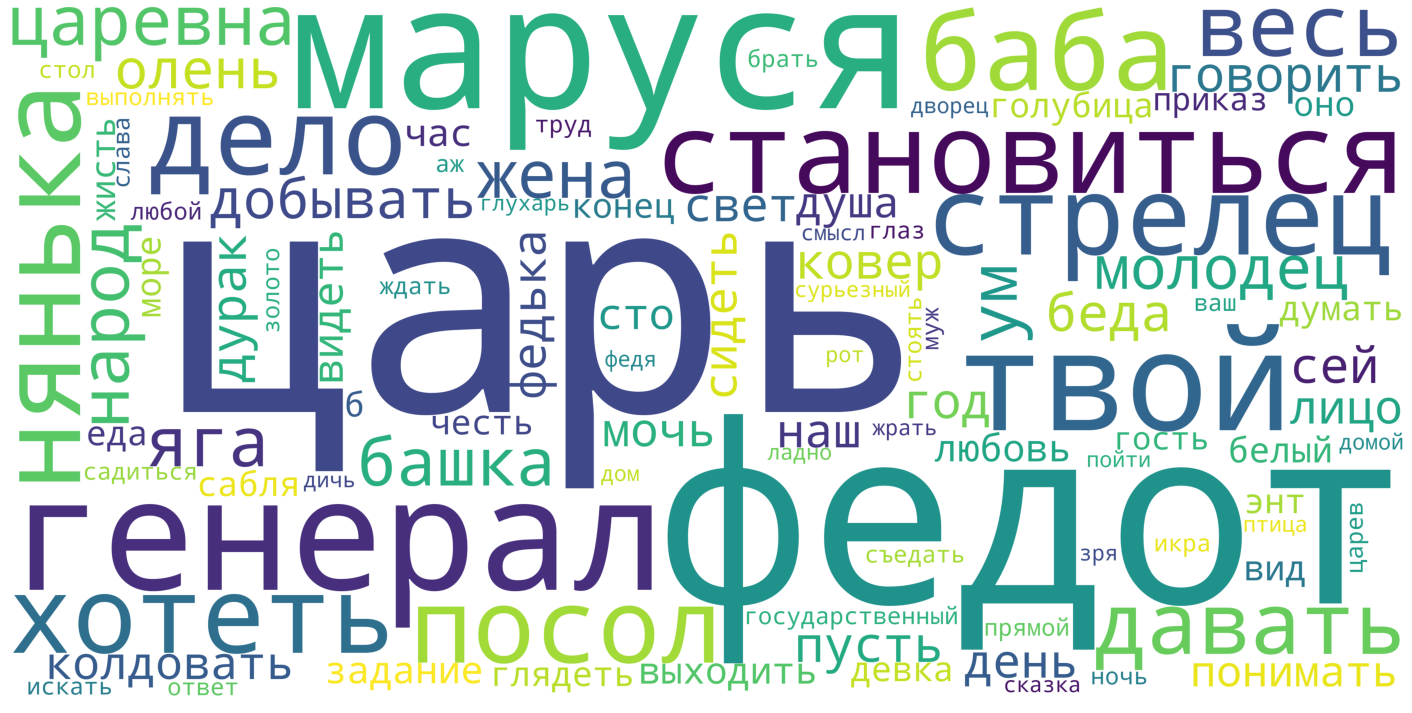

In [37]:
from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=None).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

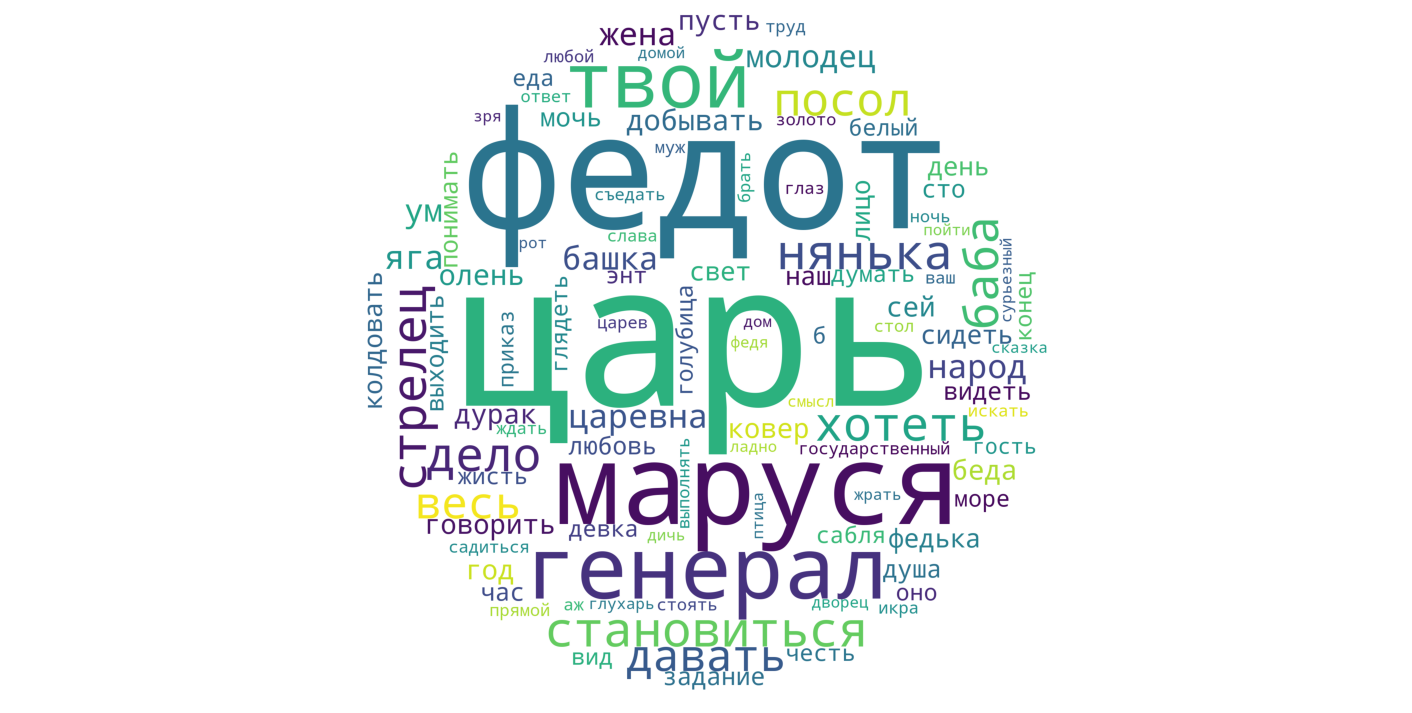

In [38]:
# можем использовать и (или создавать) различные маски

import numpy as np

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: 
        center = (int(w/2), int(h/2))
    if radius is None: 
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y-center[1]) **2)

    mask = dist_from_center <= radius
    mask = ~mask
    
    return mask

mask = create_circular_mask(2000, 4000)
mask = 255 * mask.astype(int)

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=mask).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

### Дальнейшая задача для меня - проанализировать, откуда и в каком виде я получаю текстовые данные (обычно это результаты опросов в табличной форме) и оптимизировать первый этап - извлечение данных для обработки и визуализации.. 